In [1]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


image_of_Chandler = face_recognition.load_image_file('known/Chandler.jpg')
Chandler_face_encoding = face_recognition.face_encodings(image_of_Chandler)[0]

image_of_Joey = face_recognition.load_image_file('known/Joey.jpg')
Joey_face_encoding = face_recognition.face_encodings(image_of_Joey)[0]

image_of_Monica = face_recognition.load_image_file('known/Monica.jpg')
Monica_face_encoding = face_recognition.face_encodings(image_of_Monica)[0]

image_of_Phoebe = face_recognition.load_image_file('known/Phoebe.jpg')
Phoebe_face_encoding = face_recognition.face_encodings(image_of_Phoebe)[0]

image_of_Rachel = face_recognition.load_image_file('known/Rachel.jpg')
Rachel_face_encoding = face_recognition.face_encodings(image_of_Rachel)[0]

image_of_Ross = face_recognition.load_image_file('known/Ross.jpg')
Ross_face_encoding = face_recognition.face_encodings(image_of_Ross)[0]


known_face_encodings = [
    Chandler_face_encoding,
    Joey_face_encoding,
    Monica_face_encoding,
    Phoebe_face_encoding,
    Rachel_face_encoding,
    Ross_face_encoding
]

known_face_names = [
    "Chandler",
    "Joey",
    "Monica",
    "Phoebe",
    "Rachel",
    "Ross"
]

#Load test image to find faces
test_image = face_recognition.load_image_file('unknown/test.jpg')

#find faces
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

#convert to PIL format
pil_image = Image.fromarray(test_image)

#create a ImageDraw instance
draw = ImageDraw.Draw(pil_image)

#Loop through faces in test image
for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    
    name = "Unknown Person"
    
    #if matches
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]
        
    #Draw box
    draw.rectangle(((left, top), (right, bottom)), outline=(0,0,0))
    
    #Draw label
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0,0,0), outline=(0,0,0))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255,255,255,255))
    
del draw

pil_image.save('identify.jpg')

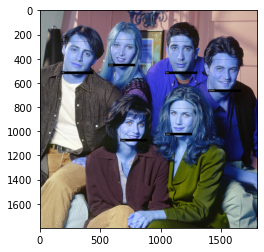

In [2]:
img = cv2.imread('identify.jpg')

plt.imshow(img)